In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import math
from matplotlib import pyplot as plt

In [5]:
boston_houseprice_data = pd.read_csv("data/housing.data",header=0,index_col=None,sep='\s+')

数据大小: (506, 14)


In [10]:
print("数据大小:  \n", boston_houseprice_data.shape)
print("数据示例： ")
boston_houseprice_data.head()

数据大小:  
 (506, 14)
数据示例： 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
data_sample = boston_houseprice_data.iloc[:, :-1].values
data_label = boston_houseprice_data.iloc[:, -1].values.reshape(-1,1)

In [13]:
mean = data_sample.mean(axis=0)
std = data_sample.std(axis=0)
data_sample = (data_sample-mean)/std

In [14]:
data_length = data_label.shape[0]
train_data_length = int(data_length * 0.8)
print("train_label_length:",train_data_length)

train_label_length: 404


In [15]:
data_sample_train, data_sample_test = data_sample[:train_data_length], data_sample[train_data_length:]
data_label_train, data_label_test = data_label[:train_data_length], data_label[train_data_length:]

In [50]:
num_iterations = 1000
lr = 0.001
weight_decay = 0.01
train_batch_size = 16
test_batch_size = 100
max_loss = math.inf
early_stopping_iter = 15
early_stopping_mark = 0
train_error = []

In [51]:
data_handler = DataHander(16)

In [52]:
opt = Optimizer(lr = lr,momentum = 0.9,iteration = 0,gamma = 0.0005,power = 0.75)

In [53]:
initializer = Initializer()

In [54]:
data_handler.get_data(sample=data_sample_train,label=data_label_train)
data_handler.shuffle()

In [55]:
dnn = DNNNet(optimizer = opt.batch_gradient_descent_anneling, initializer = initializer.xavier, batch_size = train_batch_size, weights_decay = weight_decay)
dnn.initial()

In [56]:
for i in range(num_iterations):
    print('第', i, '次迭代')
    opt.update_iteration(i)
    data_handler.pull_data()
    dnn.forward_train(data_handler.output_sample,data_handler.output_label)
    dnn.backward_train()
    dnn.update()
    train_error.append(dnn.loss.loss)
    if max_loss >  dnn.loss.loss:
        early_stopping_mark = 0
        max_loss = dnn.loss.loss
    if early_stopping_mark > early_stopping_iter:
        break
    early_stopping_mark += 1

第 0 次迭代
predict: 
  [[-2.17855006]
 [-0.06830612]
 [-1.88400996]
 [ 0.15689916]
 [-1.5764663 ]
 [-1.92708457]
 [ 0.20079785]
 [ 0.0439734 ]
 [ 0.48260857]
 [-0.49813407]
 [ 0.35426702]
 [-0.01529609]
 [ 0.77557443]
 [ 0.63569874]
 [ 0.1770889 ]
 [-0.1475898 ]]
label: 
 [[10.5]
 [22.8]
 [ 9.7]
 [20.3]
 [22.7]
 [10.2]
 [20.8]
 [25.3]
 [31.2]
 [27. ]
 [19.7]
 [19.3]
 [21.9]
 [24.8]
 [17.1]
 [36.2]]
loss:  506.68602730198205
第 1 次迭代
predict: 
  [[-0.56815157]
 [ 0.28502612]
 [-0.04192595]
 [ 0.63710978]
 [-0.0362799 ]
 [-0.39731007]
 [ 0.19094034]
 [-0.0150731 ]
 [-0.02125388]
 [-0.04385016]
 [-0.05119533]
 [ 0.67666849]
 [-0.41764421]
 [ 0.2100289 ]
 [-1.12957729]
 [-0.04962692]]
label: 
 [[14. ]
 [50. ]
 [19. ]
 [18.2]
 [19.9]
 [20.5]
 [21.1]
 [21.9]
 [21.7]
 [23.6]
 [18.4]
 [22. ]
 [20.3]
 [39.8]
 [23.3]
 [24. ]]
loss:  631.5139215340353
第 2 次迭代
predict: 
  [[-1.24578309]
 [-0.2409983 ]
 [-0.90125377]
 [ 0.11160639]
 [ 0.19871666]
 [ 0.0111124 ]
 [ 0.87254843]
 [ 0.14586281]
 [ 0.161055

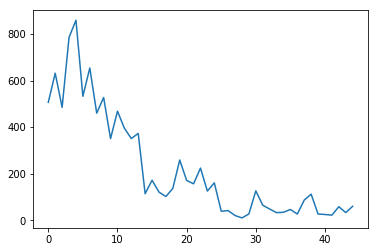

In [57]:
plt.plot(train_error)
plt.show()

In [58]:
#测试
dnn.eval(data_sample_test,data_label_test)

predict: 
  [[13.75126667]
 [16.01682834]
 [15.82339291]
 [15.43284007]
 [14.56283577]
 [13.01965896]
 [14.97113148]
 [12.41158278]
 [15.02819588]
 [13.39835525]]
label: 
 [[ 8.5]
 [ 5. ]
 [11.9]
 [27.9]
 [17.2]
 [27.5]
 [15. ]
 [17.2]
 [17.9]
 [16.3]]
mse:  47.98992180279209
rmse:  6.927475860859573
mae:  5.3624039225624385


In [32]:
class DNNNet:
    def __init__(self, optimizer = Optimizer.batch_gradient_descent_fixed, initializer = Initializer.xavier, batch_size=16, weights_decay=0.001):
        self.optimizer = optimizer
        self.initializer = initializer
        self.batch_size = batch_size
        self.weights_decay = weights_decay
        self.fc1 = FullyConnectedlayer(13,16,self.batch_size, self.weights_decay)
        self.ac1 = ActivationLayer('relu')
        self.fc2 = FullyConnectedlayer(16,1,self.batch_size, self.weights_decay)
        self.loss = Losslayer("LeastSquareLoss")

    def forward_train(self,input_data, input_label):
        self.fc1.get_inputs_for_forward(input_data)
        self.fc1.forward()
        self.ac1.get_inputs_for_forward(self.fc1.outputs)
        self.ac1.forward()
        self.fc2.get_inputs_for_forward(self.ac1.outputs)
        self.fc2.forward()

        print("predict: \n ",self.fc2.outputs)
        print("label: \n", input_label)
        self.loss.get_inputs_for_loss(self.fc2.outputs)
        self.loss.get_label_for_loss(input_label)
        self.loss.compute_loss()
        print("loss: ",self.loss.loss)


    def backward_train(self):
        self.loss.compute_gradient()
        self.fc2.get_inputs_for_backward(self.loss.grad_inputs)
        self.fc2.backward()
        self.ac1.get_inputs_for_backward(self.fc2.grad_inputs)
        self.ac1.backward()
        self.fc1.get_inputs_for_backward(self.ac1.grad_inputs)
        self.fc1.backward()

    def predict(self,input_data):
        self.fc1.get_inputs_for_forward(input_data)
        self.fc1.forward()
        self.ac1.get_inputs_for_forward(self.fc1.outputs)
        self.ac1.forward()

        self.fc2.get_inputs_for_forward(self.ac1.outputs)
        self.fc2.forward()
        return self.fc2.outputs

    def eval(self,input_data, input_label):
        self.fc1.update_batch_size(input_data.shape[0])
        self.fc1.get_inputs_for_forward(input_data)
        self.fc1.forward()
        self.ac1.get_inputs_for_forward(self.fc1.outputs)
        self.ac1.forward()
        self.fc2.update_batch_size(input_data.shape[0])
        self.fc2.get_inputs_for_forward(self.ac1.outputs)
        self.fc2.forward()
        print("predict: \n ",self.fc2.outputs[:10])
        print("label: \n", input_label[:10])
        metric = MetricCalculator(label=input_label, predict=self.fc2.outputs)
        metric.get_mae()
        metric.get_mse()
        metric.get_rmse()
        metric.print_metrics()

    def update(self):
        self.fc1.update(self.optimizer)
        self.fc2.update(self.optimizer)

    def initial(self):
        self.fc1.initialize_weights(self.initializer)
        self.fc2.initialize_weights(self.initializer)

In [18]:
class DataHander:
    def __init__(self,batch_size):
        self.data_sample = 0
        self.data_label = 0
        self.output_sample = 0
        self.output_label = 0
        self.point = 0  # 用于记住下一次pull数据的地方;
        self.batch_size = batch_size

    def get_data(self, sample, label):  # sample 每一行表示一个样本数据, label的每一行表示一个样本的标签.
        self.data_sample = sample
        self.data_label = label

    def shuffle(self):  # 用于打乱顺序;
        random_sequence = random.sample(range(self.data_sample.shape[0]), self.data_sample.shape[0])
        self.data_sample = self.data_sample[random_sequence]
        self.data_label = self.data_label[random_sequence]

    def pull_data(self):  # 把数据推向输出
        start = self.point
        end = start + self.batch_size
        output_index = np.arange(start, end)
        if end > self.data_sample.shape[0]:
            end = end - self.data_sample.shape[0]
            output_index = np.append(np.arange(start, self.data_sample.shape[0]), np.arange(0, end))
        self.output_sample = self.data_sample[output_index]
        self.output_label = self.data_label[output_index]
        self.point = end % self.data_sample.shape[0]

In [20]:
class Optimizer:
    def __init__(self, lr = 0.01, momentum = 0.9, iteration = -1, gamma=0.0005, power=0.75):
        self.lr = lr
        self.momentum = momentum
        self.iteration = iteration
        self.gamma = gamma
        self.power = power
    # 固定方法
    def fixed(self):
        return self.lr

    # inv方法
    def anneling(self):
        if self.iteration == -1:
            assert False, '需要在训练过程中,改变update_method 模块里的 iteration 的值'
        self.lr = self.lr * np.power((1 + self.gamma * self.iteration), -self.power)
        return self.lr

    # 基于批量的随机梯度下降法
    def batch_gradient_descent_fixed(self, weights, grad_weights, previous_direction):
        direction = self.momentum * previous_direction + self.lr * grad_weights
        weights_now = weights - direction
        return (weights_now, direction)

    def batch_gradient_descent_anneling(self, weights, grad_weights, previous_direction):
        self.lr = self.anneling()
        direction = self.momentum * previous_direction + self.lr * grad_weights
        weights_now = weights - direction
        return (weights_now, direction)

    def update_iteration(self, iteration):
        self.iteration = iteration

In [22]:
class Initializer:
    # xavier 初始化方法
    def xavier(self, num_neuron_inputs, num_neuron_outputs):
        temp1 = np.sqrt(6) / np.sqrt(num_neuron_inputs + num_neuron_outputs + 1)
        weights = stats.uniform.rvs(-temp1, 2 * temp1, (num_neuron_inputs, num_neuron_outputs))
        return weights

In [25]:
class ActivationFunction:
    def __init__(self):
        pass
    # sigmoid函数及其导数的定义
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def der_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # tanh函数及其导数的定义
    def tanh(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def der_tanh(self, x):
        return 1 - self.tanh(x) * self.tanh(x)

    # ReLU函数及其导数的定义
    def relu(self, x):
        temp = np.zeros_like(x)
        if_bigger_zero = (x > temp)
        return x * if_bigger_zero

    def der_relu(self, x):
        temp = np.zeros_like(x)
        if_bigger_equal_zero = (x >= temp)  # 在零处的导数设为1
        return if_bigger_equal_zero * np.ones_like(x)

    # Identity函数及其导数的定义
    def identity(self, x):
        return x

    def der_identity(self, x):
        return x

In [26]:
class ActivationLayer:
    def __init__(self, activation_function_name):
        self.actfunc = ActivationFunction()
        if activation_function_name == 'sigmoid':
            self.activation_function = self.actfunc.sigmoid
            self.der_activation_function = self.actfunc.der_sigmoid
        elif activation_function_name == 'tanh':
            self.activation_function = self.actfunc.tanh
            self.der_activation_function = self.actfunc.der_tanh
        elif activation_function_name == 'relu':
            self.activation_function = self.actfunc.relu
            self.der_activation_function = self.actfunc.der_relu
        elif activation_function_name == 'linear':
            self.activation_function = self.actfunc.identity
            self.der_activation_function = self.actfunc.der_identity
        else:
            print('wrong activation function')
        self.inputs = 0
        self.outputs = 0
        self.grad_inputs = 0
        self.grad_outputs = 0

    def get_inputs_for_forward(self, inputs):
        self.inputs = inputs

    def forward(self):
        self.outputs = self.activation_function(self.inputs)

    def get_inputs_for_backward(self, grad_outputs):
        self.grad_outputs = grad_outputs

    def backward(self):
        self.grad_inputs = self.grad_outputs * self.der_activation_function(self.inputs)

In [27]:
class LossFunction:
    # SoftmaxWithLoss函数及其导数的定义
    def softmax_logloss(self, inputs, label):
        temp1 = np.exp(inputs)
        probability = temp1 / (np.tile(np.sum(temp1, 1), (inputs.shape[1], 1))).T
        temp3 = np.argmax(label, 1)  # 纵坐标
        temp4 = [probability[i, j] for (i, j) in zip(np.arange(label.shape[0]), temp3)]
        loss = -1 * np.mean(np.log(temp4))
        return loss

    def der_softmax_logloss(self, inputs, label):
        temp1 = np.exp(inputs)
        temp2 = np.sum(temp1, 1)  # 它得到的是一维的向量;
        probability = temp1 / (np.tile(temp2, (inputs.shape[1], 1))).T
        gradient = probability - label
        return gradient

    def least_square_loss(self, predict, label):
        tmp1 = np.sum(np.square(label - predict), 1)
        loss = np.mean(tmp1)
        return loss

    def der_least_square_loss(self, predict, label):
        gradient = predict - label
        return gradient

In [28]:
class Losslayer:
    def __init__(self, loss_function_name):
        self.lossfunc = LossFunction()
        self.inputs = 0
        self.loss = 0
        self.grad_inputs = 0
        if loss_function_name == 'SoftmaxLogloss':
            self.loss_function = self.lossfunc.softmax_logloss
            self.der_loss_function = self.lossfunc.der_softmax_logloss
        elif loss_function_name == 'LeastSquareLoss':
            self.loss_function = self.lossfunc.least_square_loss
            self.der_loss_function = self.lossfunc.der_least_square_loss
        else:
            print("wrong loss function")
    def get_label_for_loss(self, label):
        self.label = label

    def get_inputs_for_loss(self, inputs):
        self.inputs = inputs

    def compute_loss(self):
        self.loss = self.loss_function(self.inputs, self.label)

    def compute_gradient(self):
        self.grad_inputs = self.der_loss_function(self.inputs, self.label)

In [29]:
class MetricCalculator:
    def __init__(self, label, predict):
        self.label = label
        self.predict = predict
        assert len(label)==len(predict), "length of label and predict must be equal"
        self.mse = None
        self.rmse = None
        self.mae = None
        self.auc = None

    def get_mse(self):
        self.mse = np.mean(np.sum(np.square(self.label - self.predict),1))

    def get_rmse(self):
        self.rmse = np.sqrt(np.mean(np.sum(np.square(self.label - self.predict), 1)))

    def get_mae(self):
        self.mae = np.mean(np.sum(np.abs(self.label - self.predict),1))

    def get_auc(self):
        prob = self.predict.reshape(-1).tolist()
        label = self.label.reshape(-1).tolist()
        f = list(zip(prob, label))
        rank = [values2 for values1, values2 in sorted(f, key=lambda x: x[0])]
        rankList = [i + 1 for i in range(len(rank)) if rank[i] == 1]
        posNum = 0
        negNum = 0
        for i in range(len(label)):
            if (label[i] == 1):
                posNum += 1
            else:
                negNum += 1
        self.auc = (sum(rankList) - (posNum * (posNum + 1)) / 2) / (posNum * negNum)

    def print_metrics(self):
        if(self.mse): print("mse: ",self.mse)
        if(self.rmse): print("rmse: ",self.rmse)
        if(self.mae): print("mae: ",self.mae)
        if(self.auc): print("auc: ",self.auc)


In [31]:
class FullyConnectedlayer:
    def __init__(self, num_neuron_inputs, num_neuron_outputs, batch_size=16,weights_decay=0.001):
        self.num_neuron_inputs = num_neuron_inputs
        self.num_neuron_outputs = num_neuron_outputs
        self.inputs = np.zeros((batch_size, num_neuron_inputs))
        self.outputs = np.zeros((batch_size, num_neuron_outputs))
        self.weights = np.zeros((num_neuron_inputs, num_neuron_outputs))
        self.bias = np.zeros(num_neuron_outputs)
        self.weights_previous_direction = np.zeros((num_neuron_inputs, num_neuron_outputs))
        self.bias_previous_direction = np.zeros(num_neuron_outputs)
        self.grad_weights = np.zeros((batch_size, num_neuron_inputs, num_neuron_outputs))
        self.grad_bias = np.zeros((batch_size, num_neuron_outputs))
        self.grad_inputs = np.zeros((batch_size, num_neuron_inputs))
        self.grad_outputs = np.zeros((batch_size, num_neuron_outputs))
        self.batch_size = batch_size
        self.weights_decay = weights_decay

    def initialize_weights(self, initializer):
        self.weights = initializer(self.num_neuron_inputs, self.num_neuron_outputs)

    # 在正向传播过程中,用于获取输入;
    def get_inputs_for_forward(self, inputs):
        self.inputs = inputs

    def forward(self):
        self.outputs = self.inputs.dot(self.weights)+ np.tile(self.bias, (self.batch_size, 1))

    # 在反向传播过程中,用于获取输入;
    def get_inputs_for_backward(self, grad_outputs):
        self.grad_outputs = grad_outputs

    def backward(self):
        # 求权值的梯度,求得的结果是一个三维的数组,因为有多个样本;
        for i in np.arange(self.batch_size):
            self.grad_weights[i, :] = np.tile(self.inputs[i, :], (1, 1)).T.dot(np.tile(self.grad_outputs[i, :], (1, 1))) + self.weights * self.weights_decay
        # 求偏置的梯度;
        self.grad_bias = self.grad_outputs
        # 求输入的梯度;
        self.grad_inputs = self.grad_outputs.dot(self.weights.T)

    def update(self, optimizer):
        # 权值与偏置的更新;
        grad_weights_average = np.mean(self.grad_weights, 0)
        grad_bias_average = np.mean(self.grad_bias, 0)
        (self.weights, self.weights_previous_direction) = optimizer(self.weights, grad_weights_average,self.weights_previous_direction)
        (self.bias, self.bias_previous_direction) = optimizer(self.bias,grad_bias_average, self.bias_previous_direction)

    def update_batch_size(self,batch_size):
        self.batch_size = batch_size